# ANSUR II Dataset - Anthropometric Analysis

#### Explanations that may be required from a document prepared about data:

The 2012 US Army Anthropometric Survey (ANSUR II) was executed by the Natick Soldier Research, Development and Engineering Center (NSRDEC) from October 2010 to April 2012. It's comprised of personnel representing the total US Army force to include the US Army Active Duty, Reserves, and National Guard. In addition to the anthropometric and demographic data, the ANSUR II database also consists of 3D whole body, foot, and head scans of Soldier participants. These 3D data are not publicly available out of respect for the privacy of ANSUR II participants. The data from this survey are used for a wide range of equipment design, sizing, and tariffing applications within the military and has many potential commercial, industrial, and academic applications.
Reach Complete Data Dict via : ANSUR II Databases Overview.pd

#### Dataset Shape

The ANSUR II working databases contain 93 anthropometric measurements which were directly measured, and 15 demographic/administrative variables explained below. The ANSUR II Male working database contains a total sample of 4,082 subjects text. The ANSUR II Female working database contains a total sample of 1,986 subjects. The databases are reported in the associated spreadsheet files:
a. “ANSUR II MALE Public.csv”
b. “ANSUR II FEMALE Public.csv”.

## Imports

In [1]:
import numpy as np
import pandas as pd
import scipy

import matplotlib.pyplot as plt
import seaborn as sns

# set the max columns to none
pd.set_option('display.max_columns', None)

## Paths

In [2]:
ansur_male_path = "../data/ansur/ANSUR II MALE Public.csv"
ansur_female_path = "../data/ansur/ANSUR II FEMALE Public.csv"

## Dataframe

In [3]:
ansur_male = pd.read_csv(ansur_male_path, encoding = 'cp1252')
ansur_female = pd.read_csv(ansur_female_path, encoding = 'cp1252')

In [4]:
ansur_male.head()

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10027,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,332,366,1071,685,422,441,502,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,815,175,853,Male,4-Oct-10,Fort Hood,Regular Army,Combat Arms,19D,North Dakota,1,NaN,1,41,71,180,Right hand
1,10032,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,312,356,1046,620,441,447,490,540,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,726,167,815,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,1,NaN,1,35,68,160,Left hand
2,10033,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,1288,854,636,359,40,61,23,237,810,103,270,355,357,575,491,1115,93,220,203,148,573,202,356,70,349,393,1053,665,462,475,496,556,482,72,409,123,403,434,1447,121,431,268,1276,367,167,917,910,604,1867,1735,1438,1105,685,198,807,477,125,918,1678,472,329,964,255,411,1041,929,180,831,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,2,NaN,2,42,68,205,Left hand
3,10092,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,143,991,242,821,560,437,395,1423,296,1114,262,1205,769,590,341,39,66,25,272,794,106,267,352,318,593,467,1034,91,217,194,158,576,199,341,68,338,367,986,640,458,461,460,511,452,76,393,106,407,446,1357,118,393,249,1155,330,148,903,848,550,1708,1655,1346,1021,604,180,803,445,127,847,1625,461,315,857,205,399,968,794,176,793,Male,12-Oct-10,Fort Hood,Regular Army,Combat Service Support,88M,Wisconsin,1,NaN,1,31,66,175,Right hand
4,10093,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,138,1029,275,1080,706,567,425,1684,304,1048,232,1452,1014,682,382,32,56,19,188,814,111,305,399,324,605,550,1279,94,222,218,153,566,197,374,69,332,372,1251,675,481,505,612,666,585,85,458

In [5]:
ansur_female.head()

,SubjectId,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10037,231,1282,301,204,1180,222,177,373,315,263,466,65,338,301,141,1011,223,836,587,476,360,1336,274,922,245,1095,759,557,310,35,65,16,220,713,91,246,316,265,517,432,1028,75,182,184,141,548,191,314,69,345,388,966,645,363,399,435,496,447,55,404,118,335,368,1268,113,362,235,1062,327,148,803,809,513,1647,1560,1280,1013,622,174,736,430,110,844,1488,406,295,850,217,345,942,657,152,756,Female,5-Oct-10,Fort Hood,Regular Army,Combat Support,92Y,Germany,2,NaN,2,26,61,142,Right hand
1,10038,194,1379,320,207,1292,225,178,372,272,250,430,64,294,270,126,893,186,900,583,483,350,1440,261,839,206,1234,835,549,329,32,60,23,208,726,91,249,341,247,468,463,1117,78,187,189,138,535,180,307,60,315,335,1048,595,340,375,483,532,492,69,334,115,302,345,1389,110,426,259,1014,346,142,835,810,575,1751,1665,1372,1107,524,152,771,475,125,901,1470,422,254,708,168,329,1032,534,155,815,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,California,3,Mexican,3,21,64,120,Right hand
2,10042,183,1369,329,233,1271,237,196,397,300,276,450,69,309,270,128,987,204,861,583,466,384,1451,287,874,223,1226,821,643,374,36,65,26,204,790,100,265,343,262,488,469,1060,84,198,195,146,588,207,331,70,356,399,1043,655,345,399,470,530,469,64,401,135,325,369,1414,122,398,258,1049,362,164,904,855,568,1779,1711,1383,1089,577,164,814,458,129,882,1542,419,269,727,159,367,1035,663,162,799,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,35D,Texas,1,NaN,1,23,68,147,Right hand
3,10043,261,1356,306,214,1250,240,188,384,364,276,484,68,340,294,144,1012,253,897,599,471,372,1430,269,1008,285,1170,804,640,351,38,62,22,244,775,97,265,331,309,529,455,1069,80,192,186,153,593,206,332,68,337,402,1029,655,392,435,469,520,478,67,402,118,357,386,1329,115,394,250,1121,333,157,875,815,536,1708,1660,1358,1065,679,187,736,463,125,866,1627,451,302,923,235,371,999,782,173,818,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,District of Columbia,8,Caribbean Islander,2,22,66,175,Right hand
4,10051,309,1303,308,214,1210,217,182,378,320,336,525,67,300,295,135,1281,284,811,607,467,433,1362,305,1089,290,1112,726,686,356,34,65,18,233,732,88,247,339,260,596,447,1039,78,183,187,140,522,181,308,63

#### As you can see from the male and female dataset, the column subjectid and SubjectId are not the same.

In [6]:
ansur_female.rename(columns={'SubjectId':'subjectid'}, inplace=True)

In [7]:
ansur_female.head()

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10037,231,1282,301,204,1180,222,177,373,315,263,466,65,338,301,141,1011,223,836,587,476,360,1336,274,922,245,1095,759,557,310,35,65,16,220,713,91,246,316,265,517,432,1028,75,182,184,141,548,191,314,69,345,388,966,645,363,399,435,496,447,55,404,118,335,368,1268,113,362,235,1062,327,148,803,809,513,1647,1560,1280,1013,622,174,736,430,110,844,1488,406,295,850,217,345,942,657,152,756,Female,5-Oct-10,Fort Hood,Regular Army,Combat Support,92Y,Germany,2,NaN,2,26,61,142,Right hand
1,10038,194,1379,320,207,1292,225,178,372,272,250,430,64,294,270,126,893,186,900,583,483,350,1440,261,839,206,1234,835,549,329,32,60,23,208,726,91,249,341,247,468,463,1117,78,187,189,138,535,180,307,60,315,335,1048,595,340,375,483,532,492,69,334,115,302,345,1389,110,426,259,1014,346,142,835,810,575,1751,1665,1372,1107,524,152,771,475,125,901,1470,422,254,708,168,329,1032,534,155,815,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,California,3,Mexican,3,21,64,120,Right hand
2,10042,183,1369,329,233,1271,237,196,397,300,276,450,69,309,270,128,987,204,861,583,466,384,1451,287,874,223,1226,821,643,374,36,65,26,204,790,100,265,343,262,488,469,1060,84,198,195,146,588,207,331,70,356,399,1043,655,345,399,470,530,469,64,401,135,325,369,1414,122,398,258,1049,362,164,904,855,568,1779,1711,1383,1089,577,164,814,458,129,882,1542,419,269,727,159,367,1035,663,162,799,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,35D,Texas,1,NaN,1,23,68,147,Right hand
3,10043,261,1356,306,214,1250,240,188,384,364,276,484,68,340,294,144,1012,253,897,599,471,372,1430,269,1008,285,1170,804,640,351,38,62,22,244,775,97,265,331,309,529,455,1069,80,192,186,153,593,206,332,68,337,402,1029,655,392,435,469,520,478,67,402,118,357,386,1329,115,394,250,1121,333,157,875,815,536,1708,1660,1358,1065,679,187,736,463,125,866,1627,451,302,923,235,371,999,782,173,818,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,District of Columbia,8,Caribbean Islander,2,22,66,175,Right hand
4,10051,309,1303,308,214,1210,217,182,378,320,336,525,67,300,295,135,1281,284,811,607,467,433,1362,305,1089,290,1112,726,686,356,34,65,18,233,732,88,247,339,260,596,447,1039,78,183,187,140,522,181,308,63

### Concatenate both dataframes

In [8]:
df = pd.concat([ansur_male, ansur_female])

In [9]:
df.head()

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10027,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,332,366,1071,685,422,441,502,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,815,175,853,Male,4-Oct-10,Fort Hood,Regular Army,Combat Arms,19D,North Dakota,1,NaN,1,41,71,180,Right hand
1,10032,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,312,356,1046,620,441,447,490,540,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,726,167,815,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,1,NaN,1,35,68,160,Left hand
2,10033,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,1288,854,636,359,40,61,23,237,810,103,270,355,357,575,491,1115,93,220,203,148,573,202,356,70,349,393,1053,665,462,475,496,556,482,72,409,123,403,434,1447,121,431,268,1276,367,167,917,910,604,1867,1735,1438,1105,685,198,807,477,125,918,1678,472,329,964,255,411,1041,929,180,831,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,2,NaN,2,42,68,205,Left hand
3,10092,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,143,991,242,821,560,437,395,1423,296,1114,262,1205,769,590,341,39,66,25,272,794,106,267,352,318,593,467,1034,91,217,194,158,576,199,341,68,338,367,986,640,458,461,460,511,452,76,393,106,407,446,1357,118,393,249,1155,330,148,903,848,550,1708,1655,1346,1021,604,180,803,445,127,847,1625,461,315,857,205,399,968,794,176,793,Male,12-Oct-10,Fort Hood,Regular Army,Combat Service Support,88M,Wisconsin,1,NaN,1,31,66,175,Right hand
4,10093,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,138,1029,275,1080,706,567,425,1684,304,1048,232,1452,1014,682,382,32,56,19,188,814,111,305,399,324,605,550,1279,94,222,218,153,566,197,374,69,332,372,1251,675,481,505,612,666,585,85,458

## Data Manipulation & Analysis

In [10]:
print("male: ", ansur_male.shape)
print("female: ", ansur_female.shape)
print("Total: ", df.shape)

male:  (4082, 108)
female:  (1986, 108)
Total:  (6068, 108)


There are 4082 male subjects and 1986 female subjects as confirmed by the database overview.

In [11]:
ansur_male.info()
ansur_female.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4082 entries, 0 to 4081
Columns: 108 entries, subjectid to WritingPreference
dtypes: int64(99), object(9)
memory usage: 3.4+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1986 entries, 0 to 1985
Columns: 108 entries, subjectid to WritingPreference
dtypes: int64(99), object(9)
memory usage: 1.6+ MB


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6068 entries, 0 to 1985
Columns: 108 entries, subjectid to WritingPreference
dtypes: int64(99), object(9)
memory usage: 5.0+ MB


#### NaN Values and Duplicates

In [13]:
df.isnull().sum().any()

True

In [14]:
df.isnull().sum()

subjectid                         0
abdominalextensiondepthsitting    0
acromialheight                    0
acromionradialelength             0
anklecircumference                0
                                 ..
DODRace                           0
Age                               0
Heightin                          0
Weightlbs                         0
WritingPreference                 0
Length: 108, dtype: int64

In [15]:
NaN_list =[]
for columns in df.columns:
    if df[columns].isnull().sum() > 0:
        print("{name} = {qty}".format(name = columns, qty = df[columns].isnull().sum()))
        NaN_list.append(columns)

Ethnicity = 4647


In [16]:
df = df.drop(NaN_list, axis=1)
df.isnull().sum().any()

False

#### Drop SubjectNumericRace

In [17]:
df[["DODRace","SubjectNumericRace"]]

,DODRace,SubjectNumericRace
0,1,1
1,1,1
2,2,2
3,1,1
4,2,2
...,...,...
1981,3,3
1982,3,3
1983,2,2
1984,3,3


In [18]:
df.drop("SubjectNumericRace", axis = 1, inplace = True)

In [19]:
df.DODRace.value_counts()

1    3792
2    1298
3     679
4     188
6      59
5      49
8       3
Name: DODRace, dtype: int64

Where 1 = White, 2 = Black, 3 = Hispanic, 4 = Asian, 5 = Native American,
6 = Pacific Islander, 8 = Other

1    3792
2    1298
3     679
4     188
6      59
5      49
8       3
Name: DODRace, dtype: int64


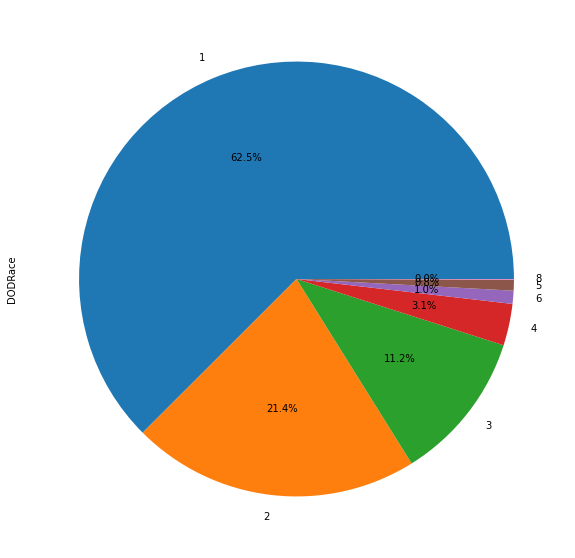

In [20]:
print(df["DODRace"].value_counts());
df["DODRace"].value_counts().plot(kind="pie", autopct='%1.1f%%',figsize=(10,10));

#### Weight

In [21]:
df[['Heightin']]

,Heightin
0,71
1,68
2,68
3,66
4,77
...,...
1981,67
1982,63
1983,66
1984,63


In [22]:
# columns that are non-numeric
for columns in df.select_dtypes(exclude=[np.number]).columns:
    print(f"{columns} has {df[columns].nunique()} unique value")

Gender has 2 unique value
Date has 253 unique value
Installation has 12 unique value
Component has 3 unique value
Branch has 3 unique value
PrimaryMOS has 285 unique value
SubjectsBirthLocation has 152 unique value
WritingPreference has 3 unique value


In [23]:
drop_list_nonnumeric = ["Date", "Installation", "Component","PrimaryMOS"]
df2 = df.drop(drop_list_nonnumeric, axis=1)

In [24]:
df2.shape

(6068, 102)

In [25]:
df2.drop("subjectid", axis = 1, inplace = True)

#### Correlation

<AxesSubplot:>

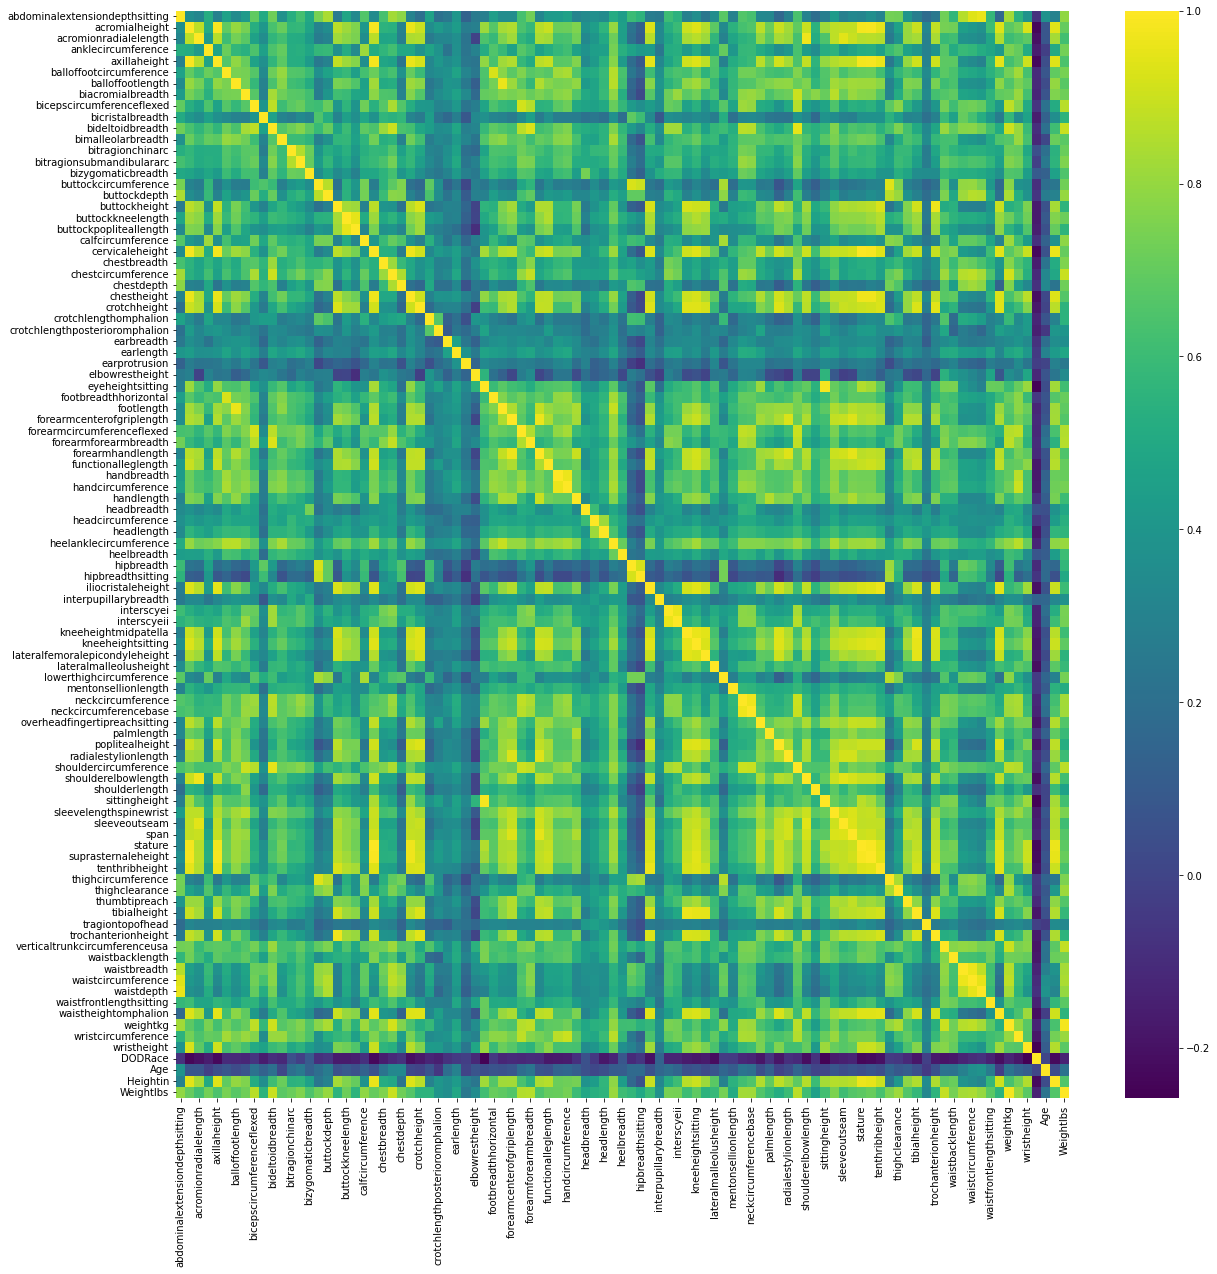

In [26]:
plt.figure(figsize=(20,20))
sns.heatmap(df2.corr(), cmap ="viridis")

function below drops all features that are outside the range of 0.9 - 0.1 and -0.9 and 0.1.

In [27]:
df_corr = df2.corr()

count = "done"
feature = []
collinear = []
correlations = []
for col in df_corr.columns:
    for i in df_corr.index:
        if (df_corr[col][i] > .9 and df_corr[col][i] < 1) or (df_corr[col][i] < -.9 and df_corr[col][i] > -1) :
                feature.append(col)
                collinear.append(i)
                correlations.append(df_corr[col][i])

In [28]:
df_col = pd.DataFrame([feature, collinear, correlations], index=["feature","collinear", "correlation coefficient"]).T
df_col

,feature,collinear,correlation coefficient
0,abdominalextensiondepthsitting,waistcircumference,0.939899
1,abdominalextensiondepthsitting,waistdepth,0.958932
2,acromialheight,axillaheight,0.987452
3,acromialheight,cervicaleheight,0.98423
4,acromialheight,chestheight,0.960106
...,...,...,...
315,Heightin,stature,0.961355
316,Heightin,suprasternaleheight,0.951331
317,Heightin,tenthribheight,0.900742
318,Heightin,waistheightomphalion,0.905858


In [29]:
df_col.loc[df_col["feature"] == "abdominalextensiondepthsitting"]

,feature,collinear,correlation coefficient
0,abdominalextensiondepthsitting,waistcircumference,0.939899
1,abdominalextensiondepthsitting,waistdepth,0.958932


![abdominalextensiondepthsitting](https://i.imgur.com/GFAKUZa.png)
![waistcircumference](https://i.imgur.com/ymYjpXL.png)
![waistdepth](https://i.imgur.com/2YOx04R.png)

As we can see from the images above, visually it clear why abdominal extension depth sitting is highly correlated with waist circumference and waist depth.

In [30]:
df_col.loc[df_col["feature"] == "acromialheight"]

,feature,collinear,correlation coefficient
2,acromialheight,axillaheight,0.987452
3,acromialheight,cervicaleheight,0.98423
4,acromialheight,chestheight,0.960106
5,acromialheight,crotchheight,0.901554
6,acromialheight,iliocristaleheight,0.934169
7,acromialheight,kneeheightsitting,0.933643
8,acromialheight,stature,0.980269
9,acromialheight,suprasternaleheight,0.985013
10,acromialheight,tenthribheight,0.946931
11,acromialheight,waistheightomphalion,0.933248


![acromialheight](https://i.imgur.com/hgVOy0y.png)
![axillaheight](https://i.imgur.com/taKDnu1.png)

Again, it's easy to observe why these two measurments are highly correlated.

In [31]:
df_col.value_counts("feature")

feature
kneeheightsitting        19
tenthribheight           17
axillaheight             16
iliocristaleheight       15
waistheightomphalion     15
                         ..
handbreadth               1
neckcircumferencebase     1
neckcircumference         1
Weightlbs                 1
chestcircumference        1
Length: 61, dtype: int64

## Data Distribution

### Functions

In [50]:
def percentiles(measure):
    # measure - the measurement or column in the dataframe
    k_percentiles = [1, 2, 3, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 97, 98, 99]
    
    male = df[df['Gender'] == "Male"][measure]
    female = df[df['Gender'] == "Female"][measure]

    print("PERCENTILES - ", measure)
    print("FEMALES ", "MALES ")
    
    for k in k_percentiles:
        if k == 1:
            print(female.quantile(k*0.01), " {k}ST ".format(k=k), male.quantile(k*0.01))
        elif k in [2, 3]:
            print(female.quantile(k*0.01), " {k}ND ".format(k=k), male.quantile(k*0.01))
        else:
            print(female.quantile(k*0.01), " {k}TH ".format(k=k), male.quantile(k*0.01))
            
def summary_stats(measure, gender="Female"):
    data = df[df['Gender'] == gender][measure]
    
    print("{gender}".format(gender=gender))
    print("MEAN: ", np.mean(data))
    print("STD ERROR (MEAN): ", scipy.stats.sem(data))
    print("STANDARD DEVIATION: ", np.std(data))
    print("STD ERROR (STD DEV): ", np.sqrt(np.sqrt(2*np.power(np.std(data), 4)/(len(data)-1))))
    print("MIN: ", np.min(data))
    print("MAX: ", np.max(data))
    
    print("SKEWNESS: ", scipy.stats.skew(data))
    print("KURTOSIS: ", scipy.stats.kurtosis(data, fisher=False))
    print("COEFFICIENT OF VARIATION: ", scipy.stats.variation(data))
    print("NUMBER OF PARTICIPANTS: ", len(data))
    
def frequency_table(measure, gender="Female"):
    
    print("FREQUENCY TABLE - ", measure, "({gender})".format(gender=gender))
    
    iw = (df[measure].max()-df[measure].min())/10
    data = df[df['Gender'] == gender][measure]
    n = len(data)
    
    # the number of bins is based on the frequency tables in the original ANSUR II dataset summary
    frequency, intervals = np.histogram(data, bins = 40)
    
    freq = pd.DataFrame(index = np.linspace(1,40,40), columns = ['start', 'end', 'F'])
    # Assign the intervals
    freq['start'] = intervals[:-1]
    freq['end'] = intervals[1:]
    # Assing Absolute frecuency
    freq['F'] = frequency
    freq["Fpct"] = freq['F']/n
    freq["CumF"] = freq['F'].cumsum()
    freq["CumFPct"] = freq['CumF']/n
    
    print(freq)
    
def plotDistribution(measure):
    for gender in ['Male','Female']:
        subset = df[df['Gender'] == gender]
    
        # Draw the density plot
        sns.distplot(subset[measure], hist = False, kde = True,
                     kde_kws = {'shade': True, 'linewidth': 3}, 
                      label = gender)
    
    # Plot formatting
    plt.legend(prop={'size': 14}, title = 'Gender')
    plt.title('Density Plot comparing {measure} Distributions'.format(measure=measure))
    plt.xlabel(measure)
    plt.ylabel('Density')
    plt.show()

The formula I used for the Standard Error for the Standard deviation was this. I am not 100% sure if this is the correct equation.

$$
  SE_{SD} = \sqrt{\sqrt{\dfrac{2\sigma^4}{N-1}}}
$$

https://groups.google.com/g/sci.stat.math/c/dsgmWBLJoHc

#### Height 

PERCENTILES -  stature
FEMALES  MALES 
1482.55  1ST  1601.62
1498.7  2ND  1621.0
1509.55  3ND  1634.0
1525.0  5TH  1648.0
1547.0  10TH  1669.0
1563.0  15TH  1685.0
1575.0  20TH  1699.0
1586.25  25TH  1710.0
1595.0  30TH  1720.0
1603.0  35TH  1729.0
1611.0  40TH  1738.0
1617.25  45TH  1745.0
1626.0  50TH  1755.0
1634.0  55TH  1764.0
1643.0  60TH  1773.0
1653.0  65TH  1782.0
1661.0  70TH  1791.0
1672.0  75TH  1802.0
1681.0  80TH  1813.0
1696.0  85TH  1827.0
1713.0  90TH  1844.0
1740.0  95TH  1870.0
1752.0  97TH  1890.0
1764.6  98TH  1904.38
1777.6000000000004  99TH  1927.0


Female
MEAN:  1628.4733131923465
STD ERROR (MEAN):  1.4405956746546726
STANDARD DEVIATION:  64.18334719535899
STD ERROR (STD DEV):  11.435093846894656
MIN:  1409
MAX:  1829
SKEWNESS:  0.08757211397826459
KURTOSIS:  3.004052229222322
COEFFICIENT OF VARIATION:  0.03941320172422009
NUMBER OF PARTICIPANTS:  1986


Male
MEAN:  1756.2146006859382
STD ERROR (MEAN):  1.0729412667010203
STANDARD DEVIATION:  68.54239043880034


c:\users\hobin\desktop\bodystats\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\users\hobin\desktop\bodystats\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


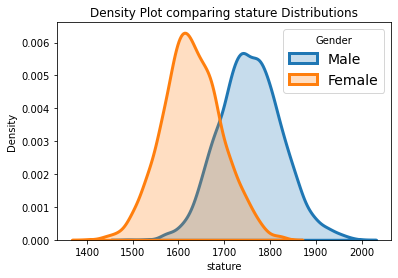

In [51]:
percentiles('stature')
print("\n")
summary_stats('stature')
print("\n")
summary_stats('stature', "Male")
print("\n")
frequency_table('stature')
print("\n")
frequency_table('stature', "Male")
plotDistribution('stature')

#### Weight

PERCENTILES -  Weightlbs
FEMALES  MALES 
103.0  1ST  130.0
106.7  2ND  135.0
110.0  3ND  138.43
115.0  5TH  145.0
120.0  10TH  150.0
125.0  15TH  158.0
128.0  20TH  163.0
130.0  25TH  168.0
135.0  30TH  170.0
137.0  35TH  175.0
140.0  40TH  180.0
142.0  45TH  181.0
145.0  50TH  185.0
148.0  55TH  190.0
150.0  60TH  193.0
155.0  65TH  197.0
158.0  70TH  200.0
161.0  75TH  207.0
165.0  80TH  212.0
170.0  85TH  220.0
177.0  90TH  226.0
188.0  95TH  240.0
196.45000000000005  97TH  250.0
200.0  98TH  255.0
210.0  99TH  270.0


Female
MEAN:  147.5050352467271
STD ERROR (MEAN):  0.5128597942267284
STANDARD DEVIATION:  22.84961617928297
STD ERROR (STD DEV):  4.070954800476916
MIN:  86
MAX:  270
SKEWNESS:  0.6078631970550428
KURTOSIS:  3.8756596212424603
COEFFICIENT OF VARIATION:  0.15490736394905522
NUMBER OF PARTICIPANTS:  1986


Male
MEAN:  188.0048995590397
STD ERROR (MEAN):  0.46864329708954927
STANDARD DEVIATION:  29.938201505105784
STD ERROR (STD DEV):  4.454424039517731
MIN:  0
MAX:  32

c:\users\hobin\desktop\bodystats\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\users\hobin\desktop\bodystats\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


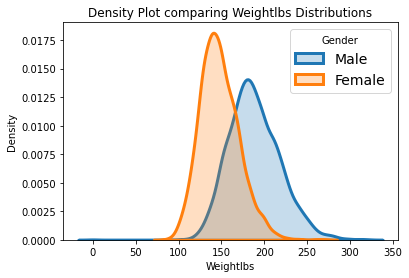

In [53]:
percentiles('Weightlbs')
print("\n")
summary_stats('Weightlbs')
print("\n")
summary_stats('Weightlbs', "Male")
print("\n")
frequency_table('Weightlbs')
print("\n")
frequency_table('Weightlbs', "Male")
plotDistribution('Weightlbs')

## Proportionality Measures